Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [2]:
from sklearn.datasets import make_classification

In [3]:
x_data_generated, y_data_generated = make_classification(scale=1)

In [4]:
x_data_generated

array([[-3.62521227e-01,  8.22335784e-02, -1.35856245e+00, ...,
        -5.27846946e-01,  6.81356057e-01,  4.59936880e-01],
       [ 8.19325332e-01, -5.30457540e-01, -2.46094217e-01, ...,
        -5.74548150e-01,  1.80245153e+00, -1.08211564e+00],
       [-9.25479589e-01,  1.38991467e+00, -5.82695130e-01, ...,
        -1.90860384e+00, -6.40532899e-02, -3.94110938e-01],
       ...,
       [-4.59198825e-01,  8.85755823e-01, -4.28058842e-01, ...,
        -9.31880420e-01,  7.71628918e-01,  3.57920928e-01],
       [ 1.21598625e+00, -1.00047403e+00,  1.50680730e+00, ...,
         6.37533318e-01,  1.42577029e+00,  1.96800906e-01],
       [ 1.64449409e+00,  3.22586766e-01,  6.21838323e-04, ...,
        -2.73717608e-01, -1.19240391e+00, -1.29438540e+00]])

In [5]:
y_data_generated

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(random_state=42).fit(x_data_generated, y_data_generated)

In [8]:
cross_val_score(clf, x_data_generated, y_data_generated, scoring='accuracy').mean()

<IPython.core.display.Javascript object>

0.8800000000000001

Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [9]:
# Выберите признаки на основе матрицы корреляции.
# сделаем новую таблицу, добавим  в нее у
print ('x_data_generated shape', x_data_generated.shape)
X = np.column_stack((x_data_generated, y_data_generated))
print ('X.shape', X.shape)

x_data_generated shape (100, 20)
X.shape (100, 21)


<Axes: >

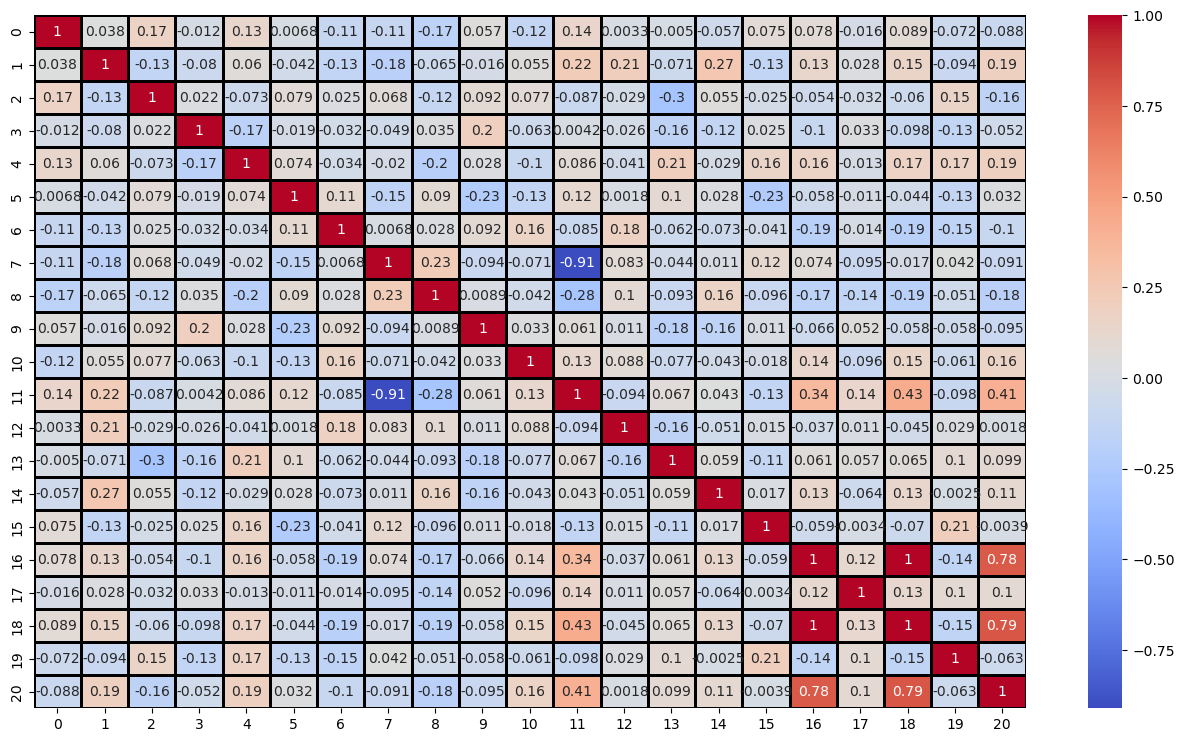

In [10]:
corr = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=1,linecolor='black', ax=ax)

По таблице видно, что есть сильная корреляция между 1 и 9, 7 и 20(целевая переменная), 9 и 11. 20 признак удалять нельзя, это целевая переменная, и с ним должна быть сильная корреляция. Удаляем только 9 признак

In [11]:
data = pd.DataFrame(X)
data = data.loc[:, (data.columns != 9)]
data.shape

(100, 20)

In [12]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=1.)
dataVT = var.fit_transform(data)
dataVT.shape

(100, 8)

In [13]:
dataVT = pd.DataFrame(dataVT)
dataVT.head()

,0,1,2,3,4,5,6,7
0,-1.358562,-0.525633,0.530821,-0.211455,-1.257645,-0.346866,-0.527847,0.681356
1,-0.246094,0.800386,0.918146,-0.106447,-1.500433,0.036264,-0.574548,1.802452
2,-0.582695,-1.662398,1.093917,-1.045937,-0.724386,2.216847,-1.908604,-0.064053
3,-0.628412,-0.885826,0.390143,-0.970895,1.495252,-1.399448,-0.389051,-1.461427
4,-1.560995,1.487480,0.762716,-0.083252,0.311480,-2.042082,-0.073696,1.509773


In [14]:
x = dataVT


In [15]:
clf = LogisticRegression(random_state=42).fit(x, y_data_generated)
cross_val_score(clf, x, y_data_generated, scoring='accuracy').mean()

<IPython.core.display.Javascript object>

0.89

Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
x2 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
print(x2.shape)
clf = LogisticRegression(random_state=42).fit(x2, y_data_generated)
cross_val_score(clf, x2, y_data_generated, scoring='accuracy').mean()

(100, 5)


<IPython.core.display.Javascript object>

0.9199999999999999

Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [17]:
# L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


In [21]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y_data_generated)
model = SelectFromModel(lsvc, prefit=True)
xLR = model.transform(x_data_generated)
xLR.shape

(100, 4)

In [22]:
xLR = pd.DataFrame(xLR)
xLR.head()

,0,1,2,3
0,-0.362521,-0.894595,-0.211455,0.681356
1,0.819325,-1.245661,-0.106447,1.802452
2,-0.925480,-0.465936,-1.045937,-0.064053
3,-0.539207,0.356520,-0.970895,-1.461427
4,0.719370,0.350012,-0.083252,1.509773


In [23]:
cross_val_score(LogisticRegression(), xLR, y_data_generated, scoring='accuracy').mean()

<IPython.core.display.Javascript object>

0.9199999999999999

In [24]:
# RandomForest
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_data_generated, y_data_generated)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
xRF = model.transform(x_data_generated)
xRF.shape               

(100, 4)

In [25]:
cross_val_score(LogisticRegression(), xRF, y_data_generated, scoring='accuracy').mean()

<IPython.core.display.Javascript object>

0.93

Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(x_data_generated, y_data_generated)
sfs.get_support()
xSFS = sfs.transform(x_data_generated)
xSFS.shape

(100, 3)

In [29]:
cross_val_score(LogisticRegression(), xSFS, y_data_generated, scoring='accuracy').mean()

<IPython.core.display.Javascript object>

0.93

Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|

In [30]:
itog = pd.DataFrame(columns=["способ выбора признаков", "кол-во признаков", "средняя точность модели"])

In [31]:
itog.loc[len(itog)]=['без выбора', 20, 0.88]
itog.loc[len(itog)]=['удаление корреляций и низковариативных', 8, 0.89]
itog.loc[len(itog)]=['SelectKBest', 5, 0.919]
itog.loc[len(itog)]=['SelectFromModel', 4, 0.919]
itog.loc[len(itog)]=['RandomForestClassifier', 4, 0.93]
itog.loc[len(itog)]=['SequentialFeatureSelector', 3, 0.93]

In [32]:
itog

,способ выбора признаков,кол-во признаков,средняя точность модели
0,без выбора,20,0.880
1,удаление корреляций и низковариативных,8,0.890
2,SelectKBest,5,0.919
3,SelectFromModel,4,0.919
4,RandomForestClassifier,4,0.930
5,SequentialFeatureSelector,3,0.930


Уменьшение признаков может улучшить качество модели 